<a href="https://colab.research.google.com/github/Tj-dev-py/Urban-Sounds-Classification-Project/blob/main/Urban_Sounds_Audio_Classification_Project_(Model_Training_and_Testing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load The Extracted Features From The Downloaded Pickle File

In [1]:
import pandas as pd
from IPython.display import display
import numpy as np

extracted_features_df = pd.read_pickle('/content/extracted_features.pkl')

display(extracted_features_df.head(), extracted_features_df.shape)

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.09133, ...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265705,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.60859, 1.6...",children_playing


(8732, 2)

In [2]:
# Splitting the dataset into independent and dependent variables
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [3]:
display(X[:5], X.shape, y[:5], y.shape)

array([[-2.15793015e+02,  7.16661224e+01, -1.31813766e+02,
        -5.20913315e+01, -2.21159668e+01, -2.17641792e+01,
        -1.11837482e+01,  1.89126835e+01,  6.72663832e+00,
         1.45568933e+01, -1.17820463e+01,  2.30103683e+00,
        -1.72513027e+01,  1.00524225e+01, -6.00949907e+00,
        -1.31531930e+00, -1.76935101e+01,  1.11712241e+00,
        -4.36994600e+00,  7.26295233e+00, -1.18159714e+01,
        -7.49526167e+00,  5.45771265e+00, -2.94424438e+00,
        -5.86938858e+00, -9.86536220e-02, -3.21217108e+00,
         4.60925150e+00, -5.82932663e+00, -5.34750843e+00,
         1.33411956e+00,  7.13078213e+00, -7.94499293e-02,
         1.71092439e+00, -5.69420004e+00, -2.90417171e+00,
         3.03669524e+00, -1.68275905e+00, -8.85858238e-01,
         3.54388624e-01],
       [-4.24686768e+02,  1.10562271e+02, -5.41482353e+01,
         6.20107384e+01, -7.09515452e-01,  1.81573963e+01,
         1.44515646e+00,  1.11611319e+01, -1.70589030e+00,
         1.23604507e+01, -1.10

(8732, 40)

array(['dog_bark', 'children_playing', 'children_playing',
       'children_playing', 'children_playing'], dtype='<U16')

(8732,)

## Seperate target from predictors

In [4]:
# Label encoding
y = np.array(pd.get_dummies(y))

In [5]:
X.shape, y.shape

((8732, 40), (8732, 10))

## Split into train and test sets

In [6]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [7]:
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6985, 40)

(1747, 40)

(6985, 10)

(1747, 10)

In [8]:
y[1]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

When we encode our label 'y', we get individual arrays for each observation which are encoded in binary, indicating to which class that specific sound file belongs to. Here's an example:



```
>>> y[1]
array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)
```

We can see that the second example in our dataset belongs to the third class, which is ***children playing***


## Model Creation

We're going to use a Deep Neural Network with Dense Layers to parse the information received by the model. 

In [9]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [10]:
# import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras import regularizers
from sklearn import metrics

In [11]:
# Number of classes
num_labels = y.shape[1]

In [12]:
num_labels

10

In [13]:
# setting a callback
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    
    monitor="val_loss",
    min_delta=0.01,
    patience=2,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,

)

In [14]:
# Creating the neural network
model = Sequential([
                    # First layer
                    Dense(220, input_shape=(40, ), activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
                    Dropout(.5),

                    # Second layer
                    Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
                    Dropout(.5),

                    # Final Layer
                    Dense(num_labels, activation='softmax')
])

In [15]:
# Model's summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 220)               9020      
                                                                 
 dropout (Dropout)           (None, 220)               0         
                                                                 
 dense_1 (Dense)             (None, 500)               110500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5010      
                                                                 
Total params: 124,530
Trainable params: 124,530
Non-trainable params: 0
_________________________________________________________________


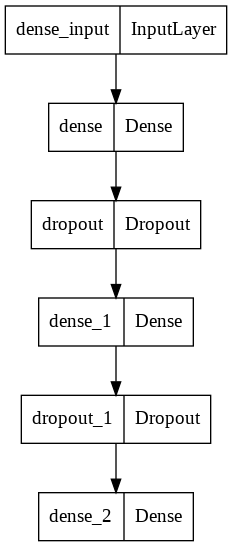

In [16]:
# Plot a diagram of the model
tf.keras.utils.plot_model(model)

In [17]:
# compiling the model

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

## Training the model

In [18]:
num_epochs = 100
num_batch_size = 32

history = model.fit(X_train, y_train,
          batch_size=num_batch_size,
          epochs=num_epochs,
          validation_data=(X_test, y_test),
          callbacks=[early_stopping]
          )

Epoch 1/100
219/219 [==============================] - 2s 6ms/step - loss: 9.0061 - accuracy: 0.2407 - val_loss: 1.9732 - val_accuracy: 0.3486
Epoch 2/100
219/219 [==============================] - 1s 5ms/step - loss: 2.1650 - accuracy: 0.3092 - val_loss: 1.8422 - val_accuracy: 0.4253
Epoch 3/100
219/219 [==============================] - 1s 5ms/step - loss: 1.8317 - accuracy: 0.3734 - val_loss: 1.6428 - val_accuracy: 0.4837
Epoch 4/100
219/219 [==============================] - 1s 5ms/step - loss: 1.6567 - accuracy: 0.4374 - val_loss: 1.4846 - val_accuracy: 0.5495
Epoch 5/100
219/219 [==============================] - 1s 5ms/step - loss: 1.5333 - accuracy: 0.4764 - val_loss: 1.3245 - val_accuracy: 0.6125
Epoch 6/100
219/219 [==============================] - 1s 5ms/step - loss: 1.4192 - accuracy: 0.5330 - val_loss: 1.2342 - val_accuracy: 0.6239
Epoch 7/100
219/219 [==============================] - 1s 5ms/step - loss: 1.3558 - accuracy: 0.5506 - val_loss: 1.1694 - val_accuracy: 0.6691

## Saving the model

In [20]:
tf.keras.models.save_model(model,'urban_classification_model.hdf5')

## Testing the model

Here we evaluate the model using tensorflow's evaluate method.

In [19]:
test_accuracy = model.evaluate(X_test, y_test)
print(test_accuracy)

55/55 [==============================] - 0s 2ms/step - loss: 0.7086 - accuracy: 0.7945
[0.7085679173469543, 0.7945048809051514]


And here, we can see the model classifying a sample audio file in real time.

In [21]:
filename = '/content/drive/MyDrive/UrbanSound8K/audio/fold7/105289-8-1-3.wav'

import librosa

def feature_extractor(file):
  audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
  mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
  mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

  return mfccs_scaled_features

In [22]:
prediction_feature = feature_extractor(filename)

our prediction feature needs to be reshaped in the form of (1, 40) in order to work with our model. 

In [23]:
# before reshaping
prediction_feature.shape

(40,)

In [24]:
# after reshaping
prediction_feature.reshape(1, -1).shape

(1, 40)

In [25]:
prediction_feature = prediction_feature.reshape(1, -1)

In [27]:
np.argmax(model.predict(prediction_feature), axis=-1)

array([8])

Looks like our model calssified this audio file as a 'Siren', belonging to class 8. 

Let's use the metadata to see if our model was accurate in its prediction.

In [28]:
metadata = pd.read_csv('/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [31]:
# Looking at the row which contains the information of our filename

metadata[metadata.slice_file_name == '105289-8-1-3.wav']

,slice_file_name,fsID,start,end,salience,fold,classID,class
430,105289-8-1-3.wav,105289,41.926771,45.926771,1,7,8,siren


**Lo and Behold, our model was accurate in its prediction!**

Looks like this model performs pretty good. This also marks the end of this audio classification project. 